In [4]:
# Created 2017, Zack Gainsforth
%pylab inline
import sys, os
import QuickPlot
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6  # that's default image size for this interactive session
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from ipywidgets.widgets import interactive, fixed, interact
%config InlineBackend.figure_format = 'retina'
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/Zack/anaconda/envs/conda35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
S = np.genfromtxt('Quants/CNO '+ str(i+1) +' Bruker Quant.txt', skip_header=5, skip_footer=2, dtype=None)
pdS = pd.DataFrame(S).sort('f1')
f0 = pdS['f0']
for i in range(8):
    S = np.genfromtxt('Quants/CNO '+ str(i+1) +' Bruker Quant.txt', skip_header=5, skip_footer=2, dtype=None)
    # Drop it into pandas, and do a sort on elemental Z.  Then 
    pdS = pd.DataFrame(S).sort('f1')
    print(pdS)
    print(pdS['f0'] == f0)

       f0  f1           f2    f3     f4     f5     f6    f7
0    b'C'   6  b'K-series'  6258  68.41  68.41  78.40  2.25
4    b'N'   7  b'K-series'   601   3.76   3.76   3.70  0.22
1    b'O'   8  b'K-series'  2584  12.83  12.83  11.03  0.49
6   b'Mg'  12  b'K-series'   135   0.54   0.54   0.30  0.07
2   b'Si'  14  b'K-series'  1887   7.84   7.84   3.84  0.21
3    b'S'  16  b'K-series'  1335   5.77   5.77   2.48  0.26
7   b'Cl'  17  b'K-series'    47   0.23   0.23   0.09  0.06
5   b'Fe'  26  b'K-series'    88   0.62   0.62   0.15  0.09
10  b'Cu'  29  b'K-series'    94   0.00   0.00   0.00  0.00
8   b'Ga'  31  b'K-series'   305   0.00   0.00   0.00  0.00
9   b'Pt'  78  b'L-series'   109   0.00   0.00   0.00  0.00
0     True
4     True
1     True
6     True
2     True
3     True
7     True
5     True
10    True
8     True
9     True
Name: f0, dtype: bool
       f0  f1           f2    f3     f4     f5     f6    f7
0    b'C'   6  b'K-series'  1390  68.74  68.74  79.11  2.79
4    b'N'   7  b'

/Users/Zack/anaconda/envs/conda35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/Zack/anaconda/envs/conda35/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [18]:
Counts = np.zeros((11,8))
print(Counts)
for i in range(8):
    S = np.genfromtxt('Quants/CNO '+ str(i+1) +' Bruker Quant.txt', skip_header=5, skip_footer=2, dtype=None)
    # Drop it into pandas, and do a sort on elemental Z.  Then 
    pdS = pd.DataFrame(S).sort('f1')
    Counts[:,i] = pdS['f3']
print(Counts[:,0])

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[ 6258.   601.  2584.   135.  1887.  1335.    47.    88.    94.   305.
   109.]


/Users/Zack/anaconda/envs/conda35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [29]:
iC = 0
iN = 1
iO = 2
iMg = 3
iSi = 4
iS = 5
iCl = 6
iFe = 7
iCu = 8
iGa = 9
iPt = 10
C_N = Counts[iC,:]/Counts[iN,:]
Pt_C = Counts[iPt,:]/Counts[iC,:]
Ga_C = Counts[iGa,:]/Counts[iC,:]
C_O = Counts[iC,:]/Counts[iO,:]
O_S = Counts[iO,:]/Counts[iS,:]
O_Si = Counts[iO,:]/Counts[iSi,:]
O_Cl = Counts[iO,:]/Counts[iCl,:]


print(C_N)


[ 10.41264559  14.78723404  11.73293769  12.53877551   8.10612245
  10.10290237  11.22891566   9.675     ]


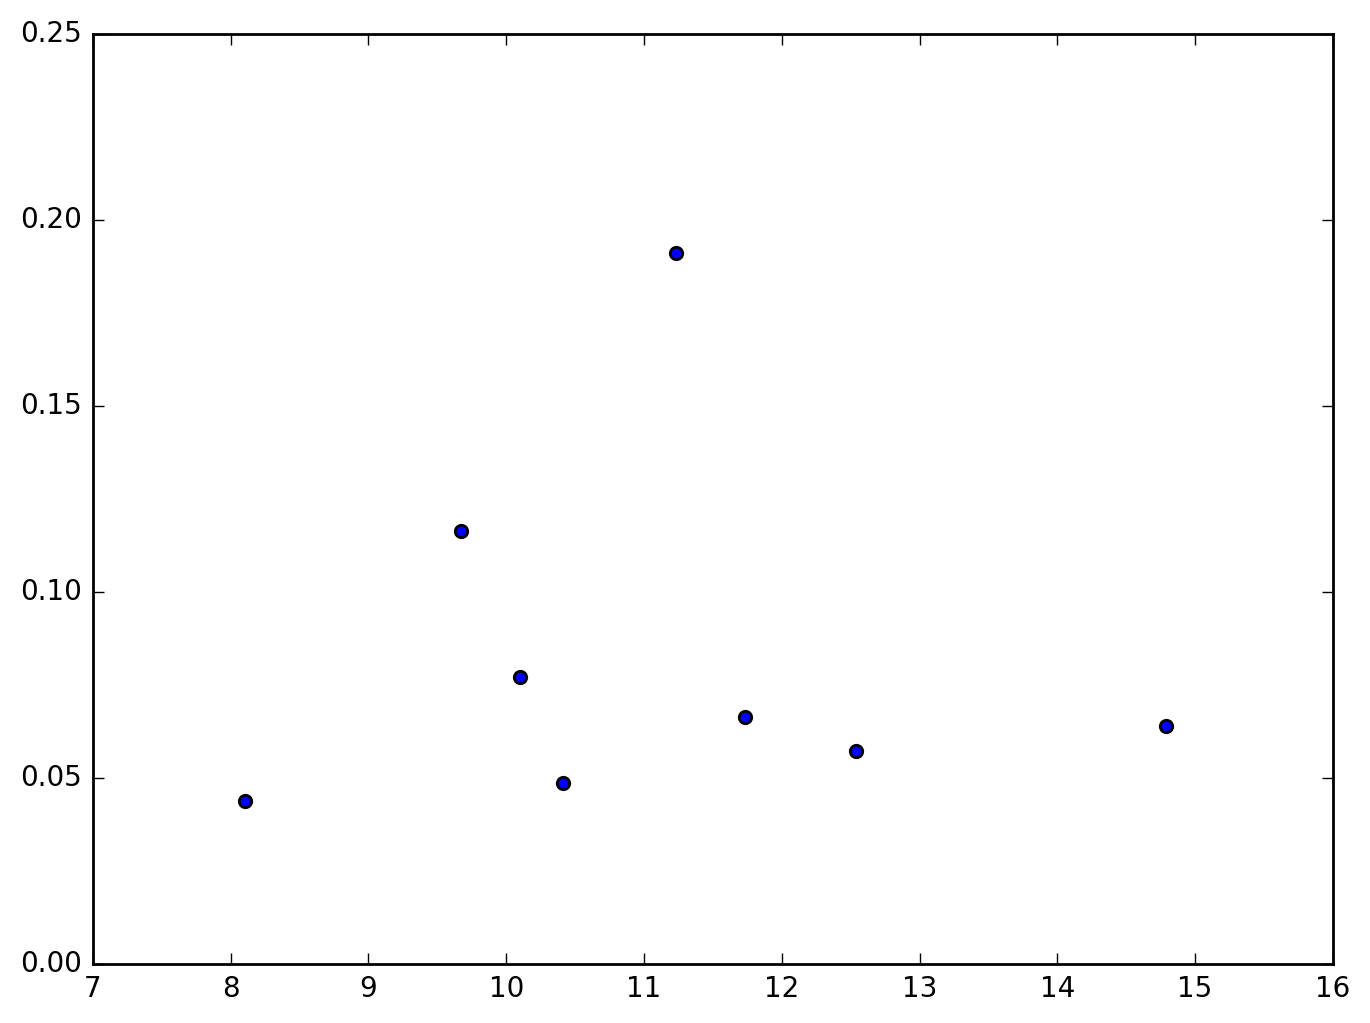

In [30]:
scatter(C_N, Ga_C)

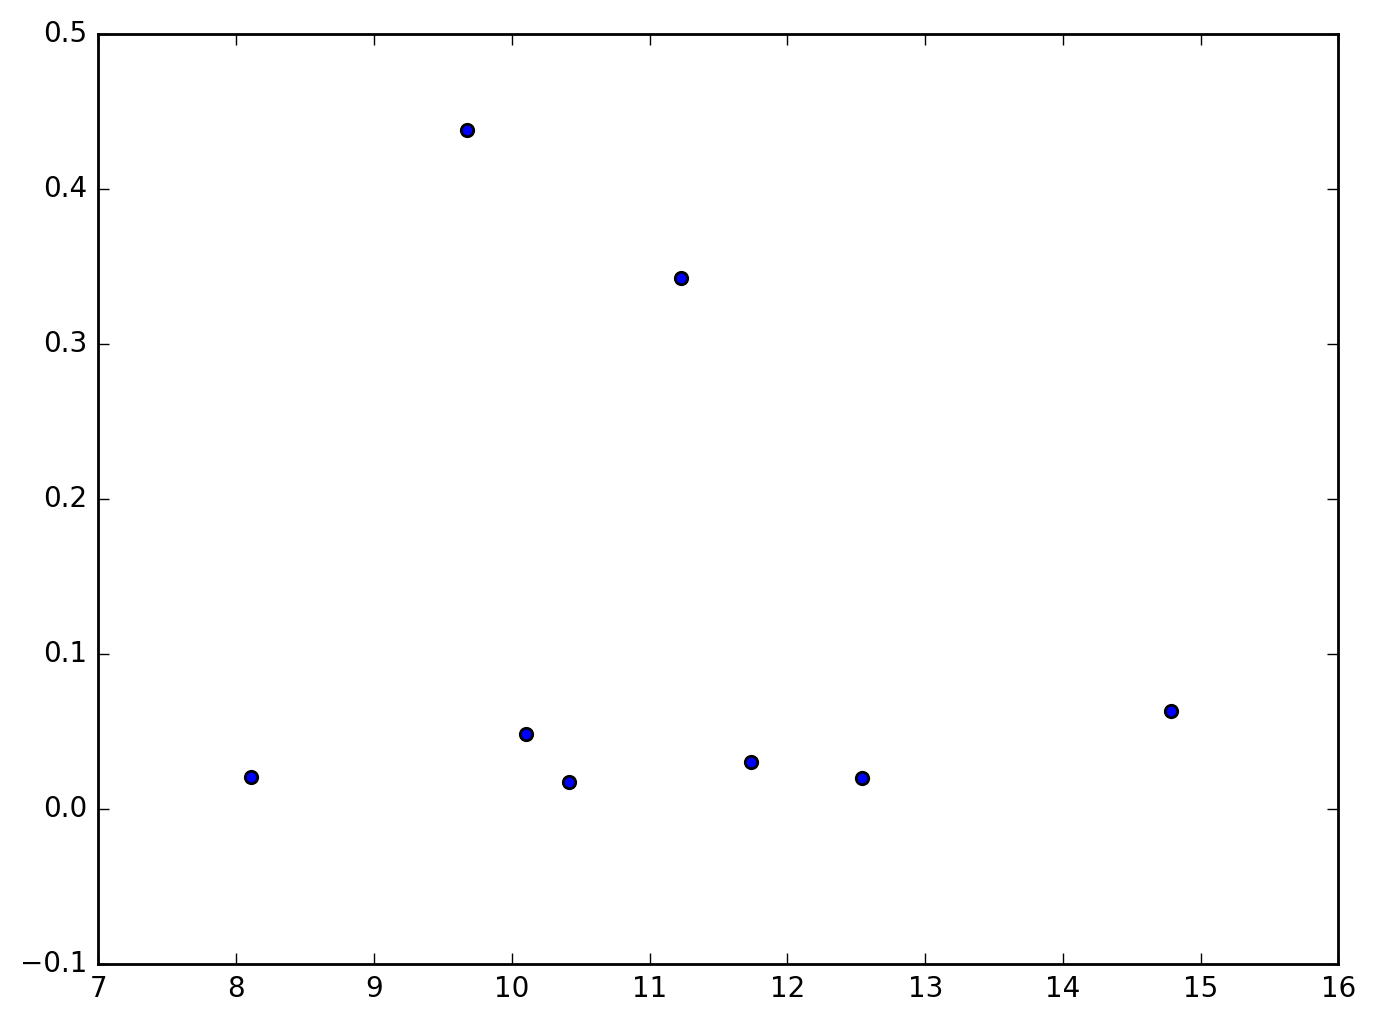

In [31]:
scatter(C_N, Pt_C)

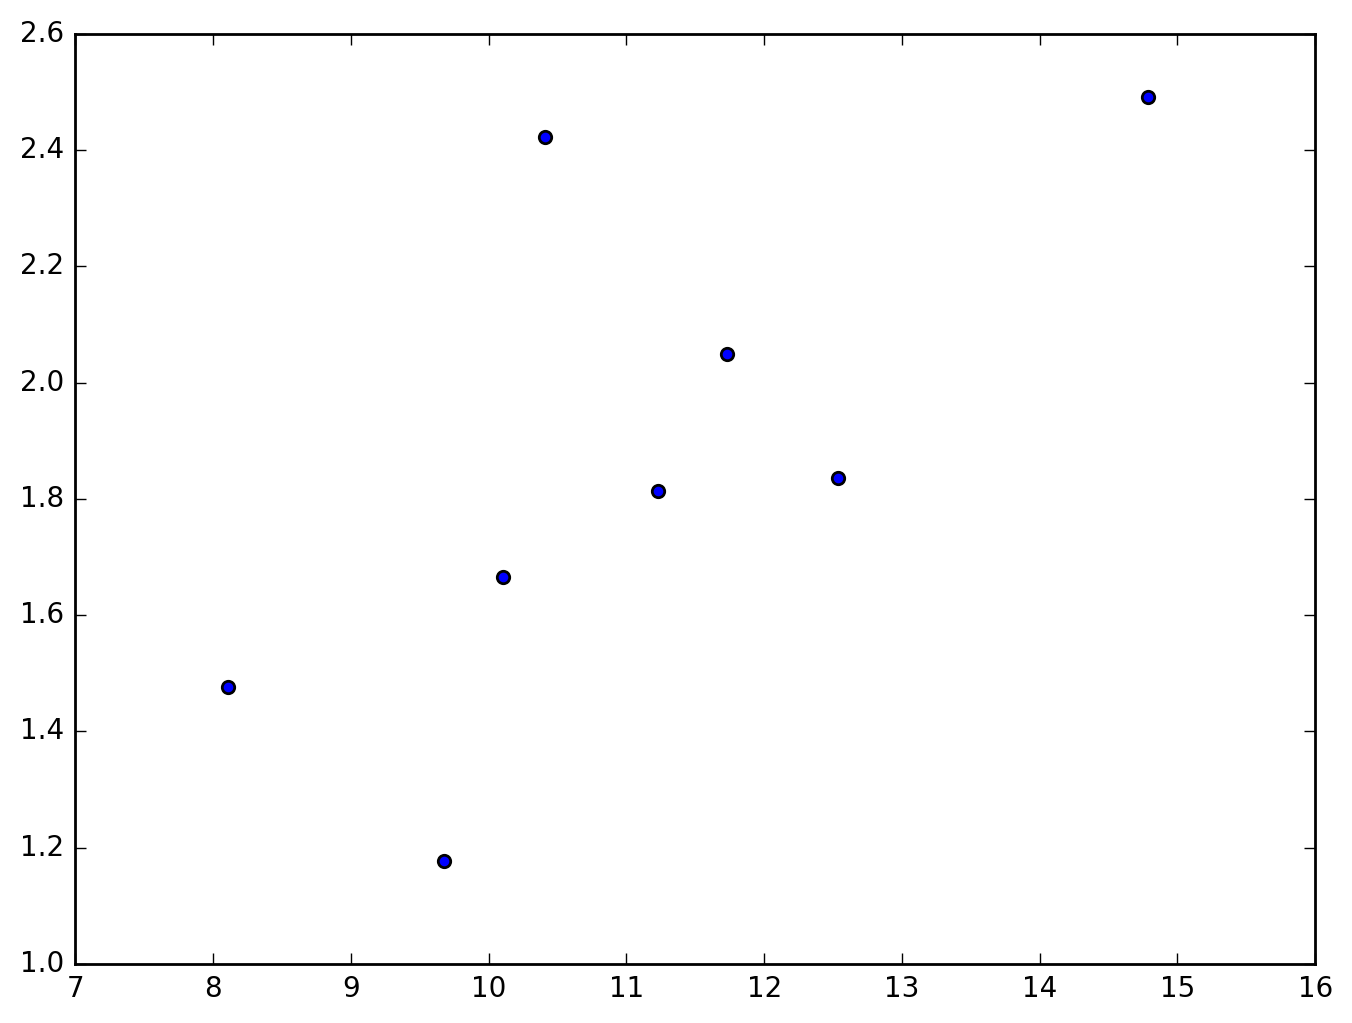

In [32]:
scatter(C_N, C_O)

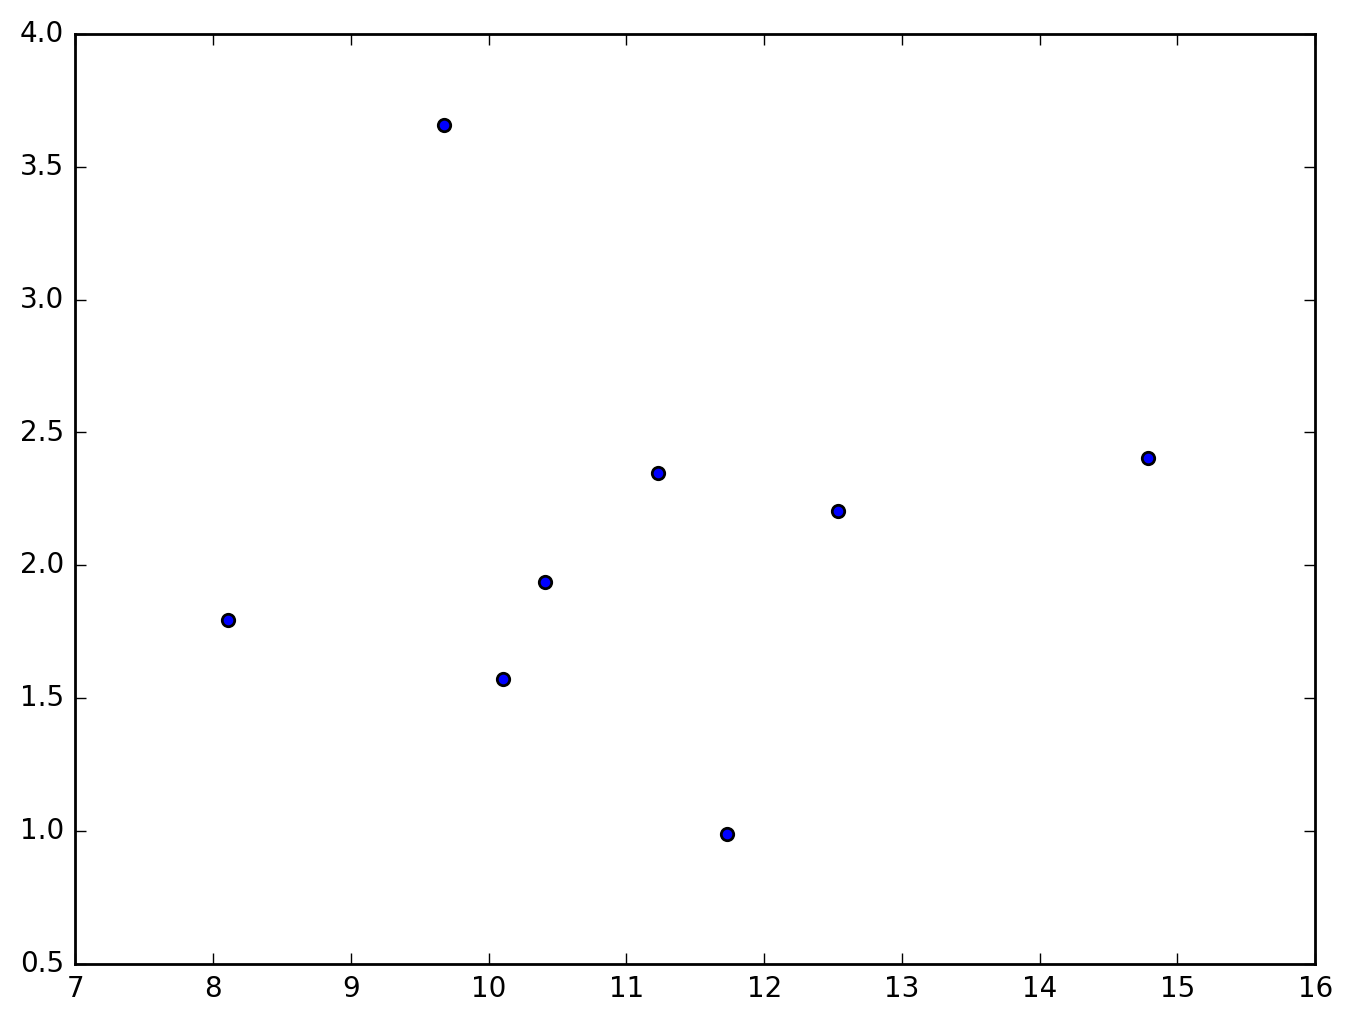

In [33]:
scatter(C_N, O_S)

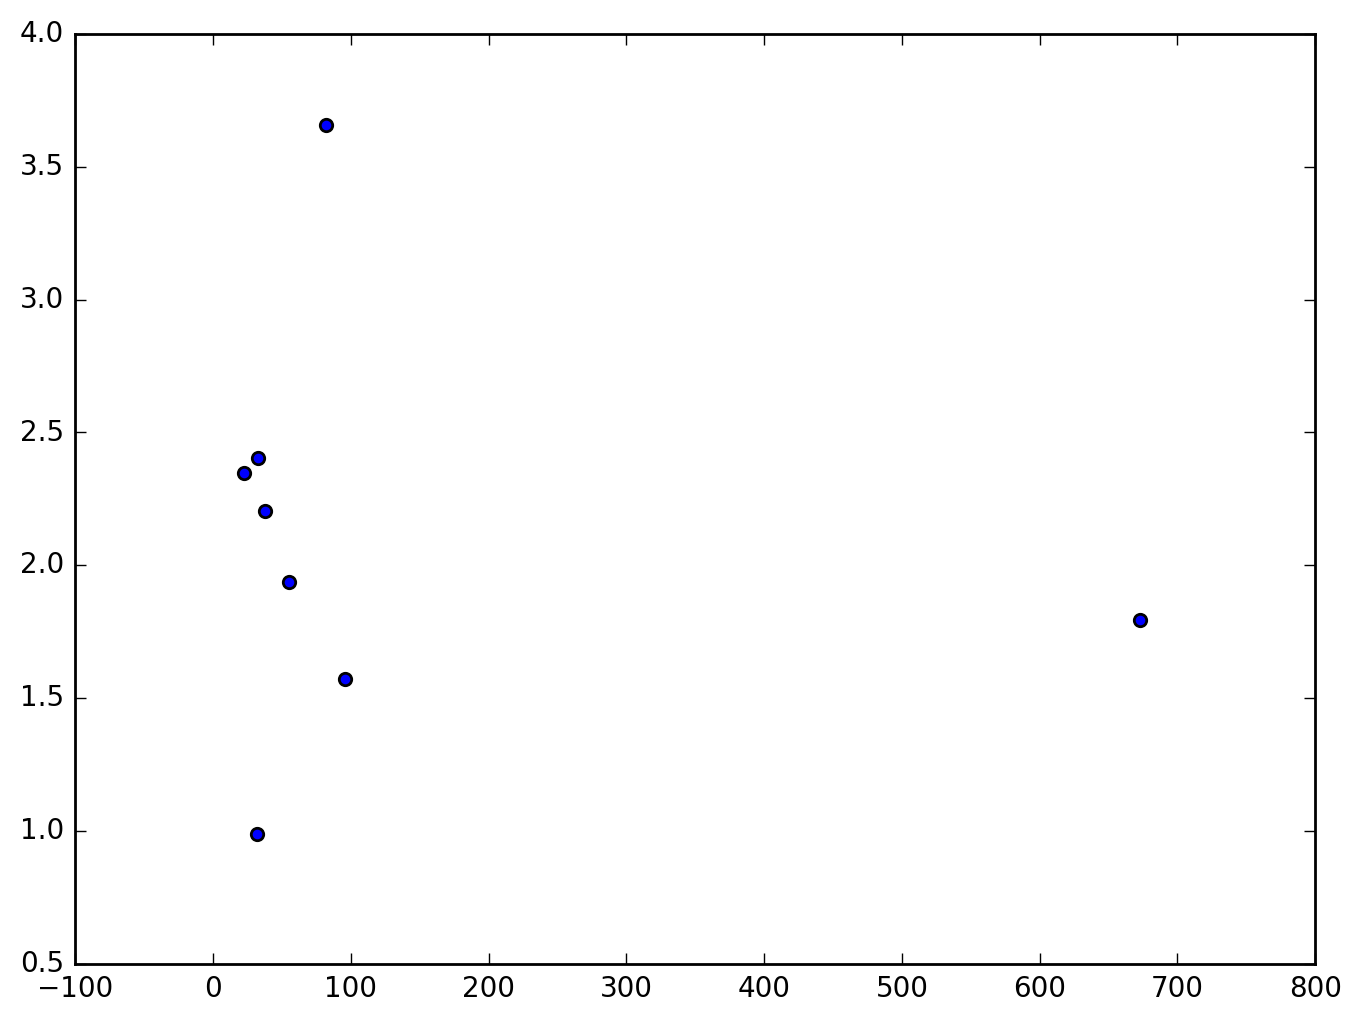

In [34]:
scatter(O_Cl, O_S)

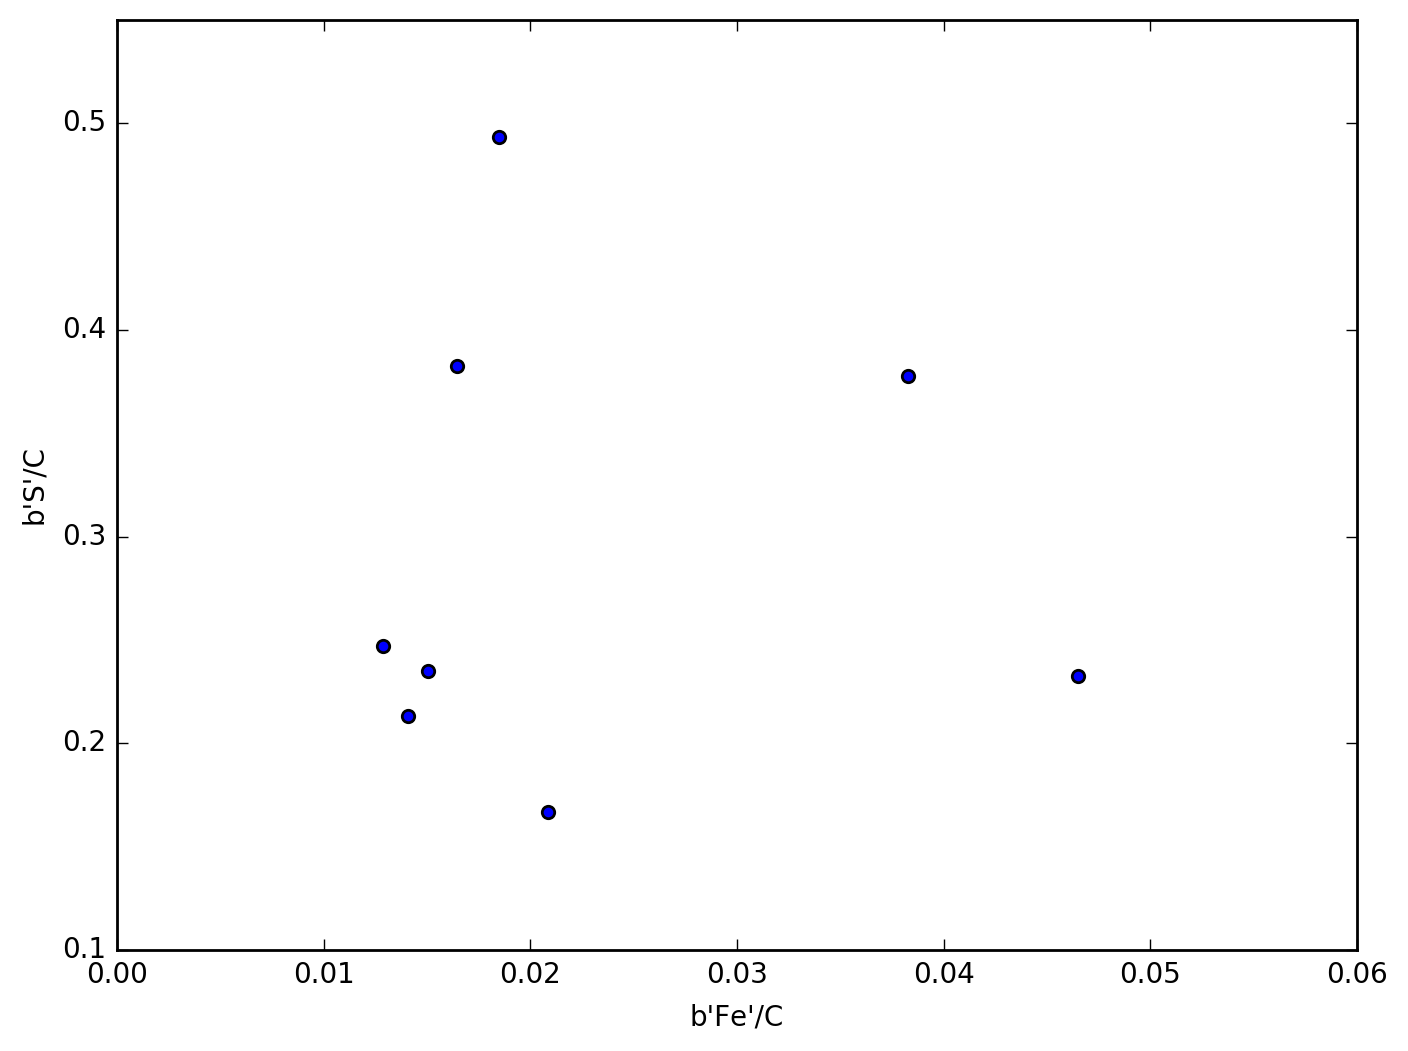

In [44]:
ElNames = np.asarray(pdS['f0'])
def PlotMe(El1, El2):
    scatter(Counts[El1,:]/Counts[iC,:], Counts[El2,:]/Counts[iC,:])
    xlabel('%s/%s'%(ElNames[El1], 'C'))
    ylabel('%s/%s'%(ElNames[El2], 'C'))
        
interact(PlotMe, El1=[0,10], El2=[0,10])

In [42]:
np.asarray(pdS['f0'])

array([b'C', b'N', b'O', b'Mg', b'Si', b'S', b'Cl', b'Fe', b'Cu', b'Ga',
       b'Pt'], dtype=object)